### Column Information

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option("display.max_columns" , None)

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.info()

## No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### Obsevation

We do not have Nan as values. But many columns like Glucose , BloodPressure, SkinThickness , Insulin , BMI cannot have 0 has a value , hence it can be associated with null values. We need to handle this.

In [7]:
print("Number of missing values in Insulin column : " , len(df.loc[df['Insulin'] == 0]))
print("Number of missing values in Glucose column : " , len(df.loc[df['Glucose'] == 0]))
print("Number of missing values in BloodPressure column : " , len(df.loc[df['BloodPressure'] == 0]))
print("Number of missing values in SkinThickness column : " , len(df.loc[df['SkinThickness'] == 0]))
print("Number of missing values in BMI column : " , len(df.loc[df['BMI'] == 0]))

Number of missing values in Insulin column :  374
Number of missing values in Glucose column :  5
Number of missing values in BloodPressure column :  35
Number of missing values in SkinThickness column :  227
Number of missing values in BMI column :  11


In [8]:
df.shape

(768, 9)

### Distribution of each columns

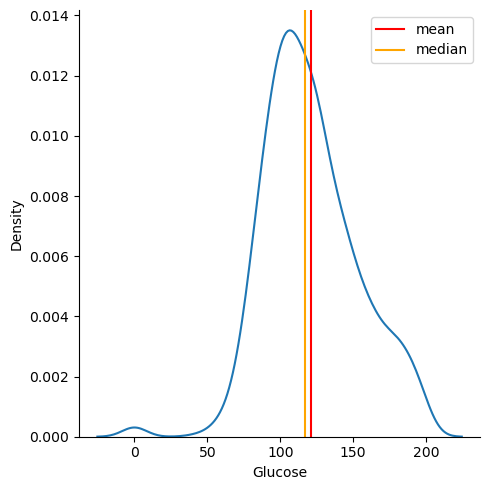

In [9]:
## Glucose
sns.displot(df['Glucose'] , kind = 'kde')
plt.axvline(x = df['Glucose'].mean(), color = 'red', label = 'mean')
plt.axvline(x = df['Glucose'].median(), color = 'orange', label = 'median')
plt.legend()
plt.show()

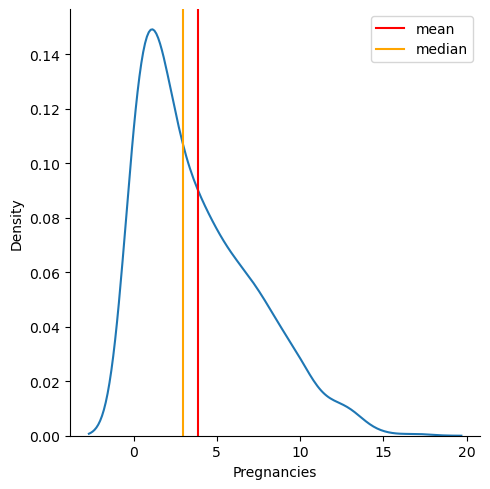

In [10]:
## Pregnancies
sns.displot(df['Pregnancies'] , kind = 'kde')
plt.axvline(x = df['Pregnancies'].mean(), color = 'red', label = 'mean')
plt.axvline(x = df['Pregnancies'].median(), color = 'orange', label = 'median')
plt.legend()
plt.show()

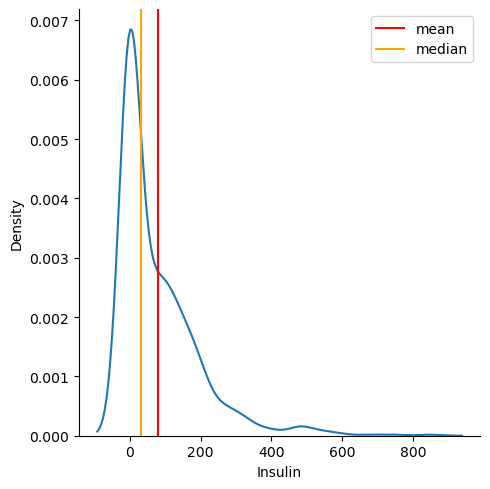

In [11]:
## Insulin
sns.displot(df['Insulin'] , kind = 'kde')
plt.axvline(x = df['Insulin'].mean(), color = 'red', label = 'mean')
plt.axvline(x = df['Insulin'].median(), color = 'orange', label = 'median')
plt.legend()
plt.show()

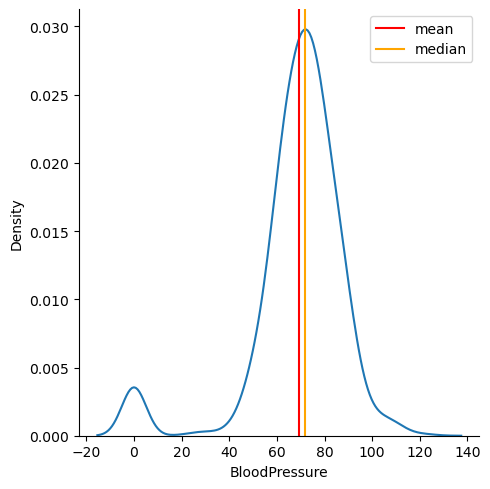

In [12]:
## BloodPressure
sns.displot(df['BloodPressure'] , kind = 'kde')
plt.axvline(x = df['BloodPressure'].mean(), color = 'red', label = 'mean')
plt.axvline(x = df['BloodPressure'].median(), color = 'orange', label = 'median')
plt.legend()
plt.show()

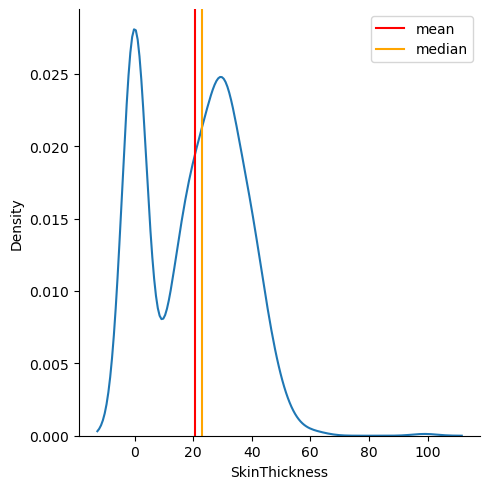

In [13]:
## SkinThickness
sns.displot(df['SkinThickness'] , kind = 'kde')
plt.axvline(x = df['SkinThickness'].mean(), color = 'red', label = 'mean')
plt.axvline(x = df['SkinThickness'].median(), color = 'orange', label = 'median')
plt.legend()
plt.show()

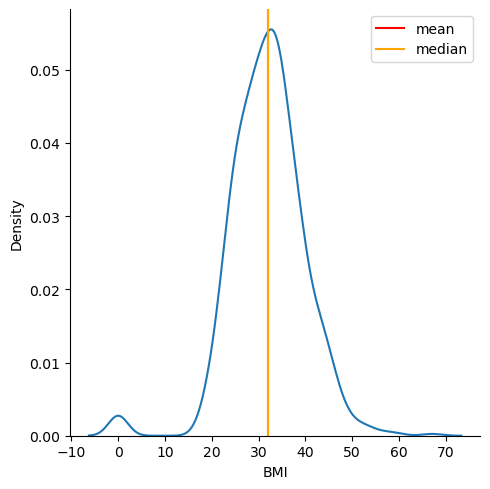

In [14]:
## BMI
sns.displot(df['BMI'] , kind = 'kde')
plt.axvline(x = df['BMI'].mean(), color = 'red', label = 'mean')
plt.axvline(x = df['BMI'].median(), color = 'orange', label = 'median')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

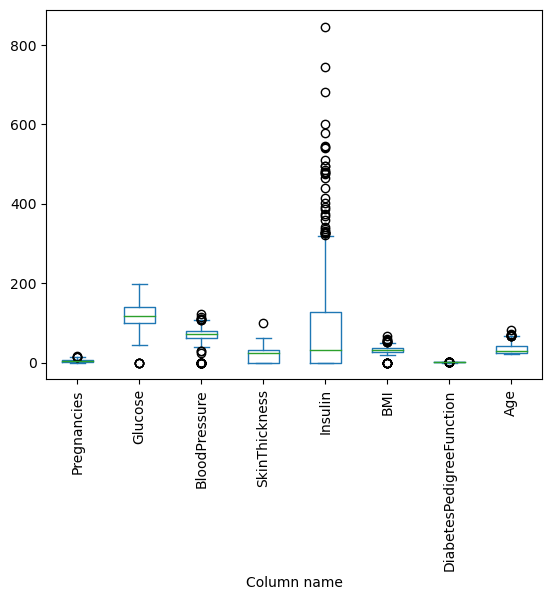

In [15]:
df1 = df.drop(columns= 'Outcome')
plt.figure( figsize= (12 ,6 ))

df1.plot.box()
plt.xticks(rotation = 90)
plt.xlabel("Column name")
plt.show()

### Observation

Based on the above distributions , we see that there many null values as well as outliers . Because of this we are getting skewed data distribution. We need to use median imputation technique because mean is very sensitive incase of outlier data. 

In [16]:
# Applying Median imputation


from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values= 0 , strategy= 'median')

In [17]:
df.iloc[: , 1:6] = imp.fit_transform(df.iloc[: , 1:6])

In [18]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [19]:
## Checking for duplicated values

df.duplicated().sum()

0

In [20]:
### No duplicate values available in the data

## Exploratory Data Analysis ( EDA )

In [21]:
### Impact of Columns

df_impact = df.groupby('Outcome').agg({"Pregnancies" : ['mean']})

for i in df.columns[1:-1]:
    new = df.groupby('Outcome').agg({i : ['mean']})
    df_impact[new.columns] = new.values

In [22]:
df_impact

Pregnancies     Glucose BloodPressure SkinThickness     Insulin  \
               mean        mean          mean          mean        mean   
Outcome                                                                   
0          3.298000  110.682000     70.920000     27.726000  127.792000   
1          4.865672  142.130597     75.123134     31.686567  164.701493   

               BMI DiabetesPedigreeFunction        Age  
              mean                     mean       mean  
Outcome                                                 
0        30.885600                 0.429734  31.190000  
1        35.383582                 0.550500  37.067164

### Observation

Based on the above data we see that for all columns,  the mean value for the repective column for Type-1 diabetes people is more than for the non Type-1 diabetes people.

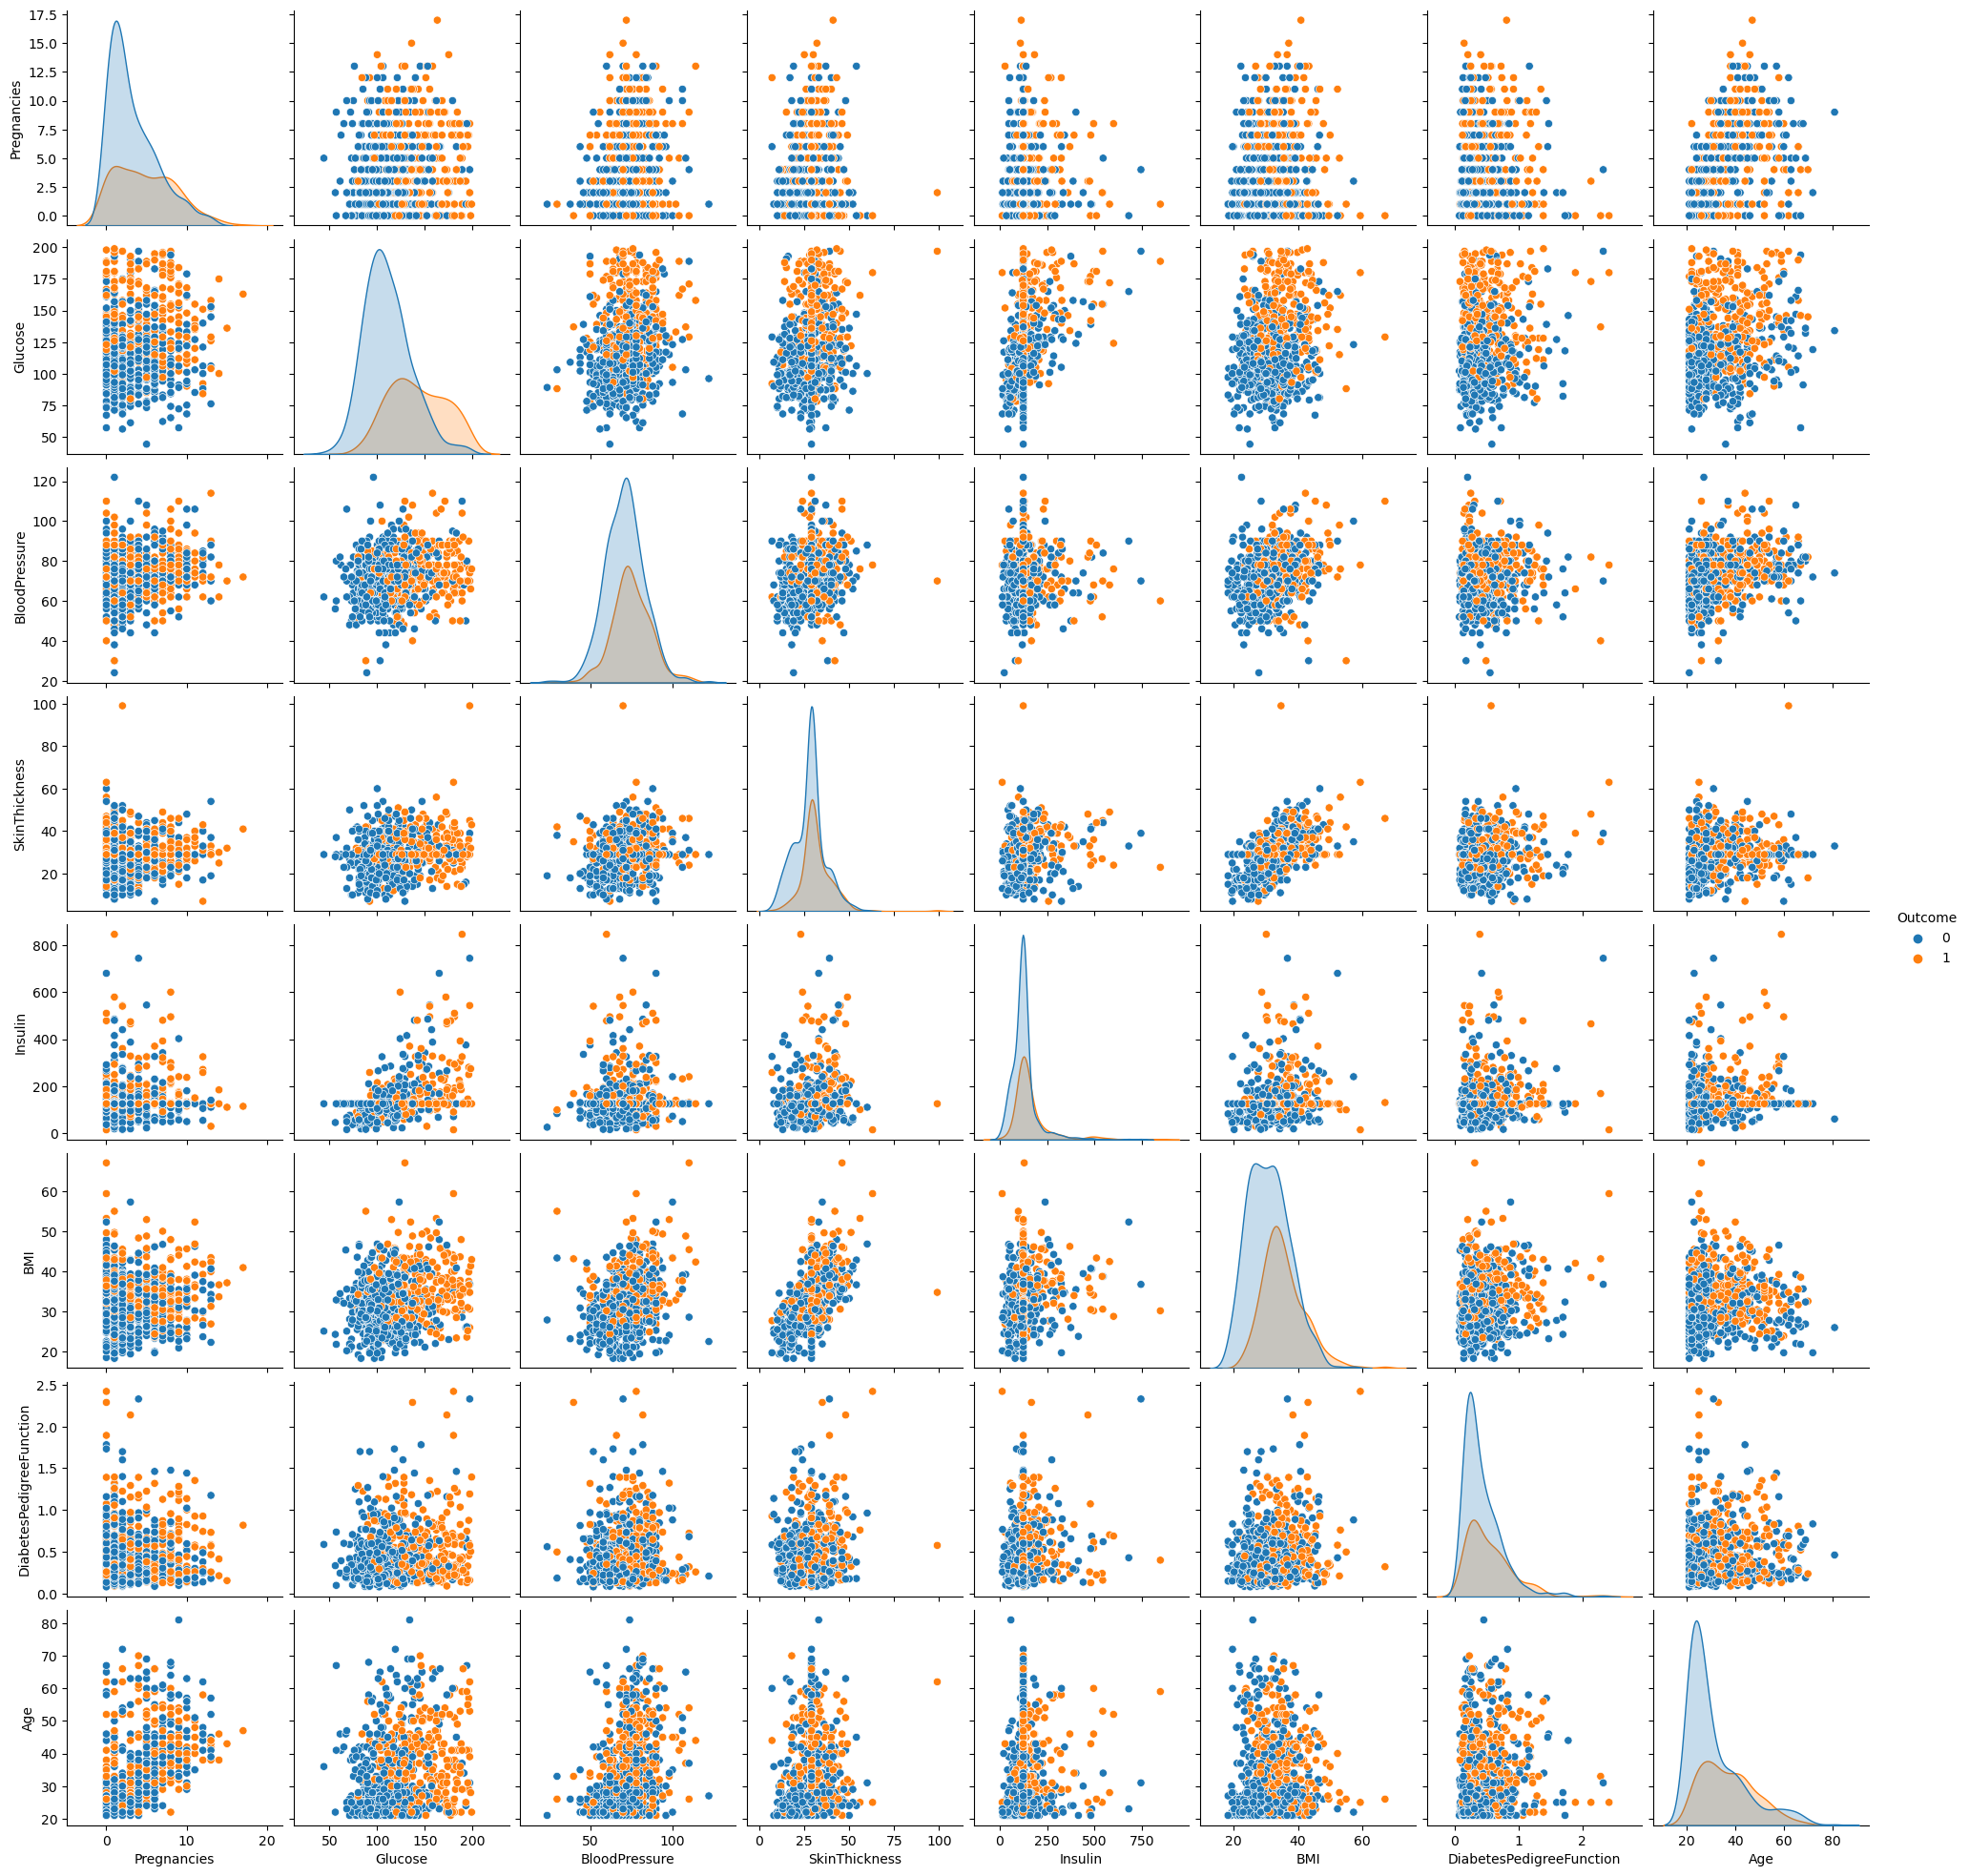

In [23]:
sns.pairplot(df , hue = 'Outcome')

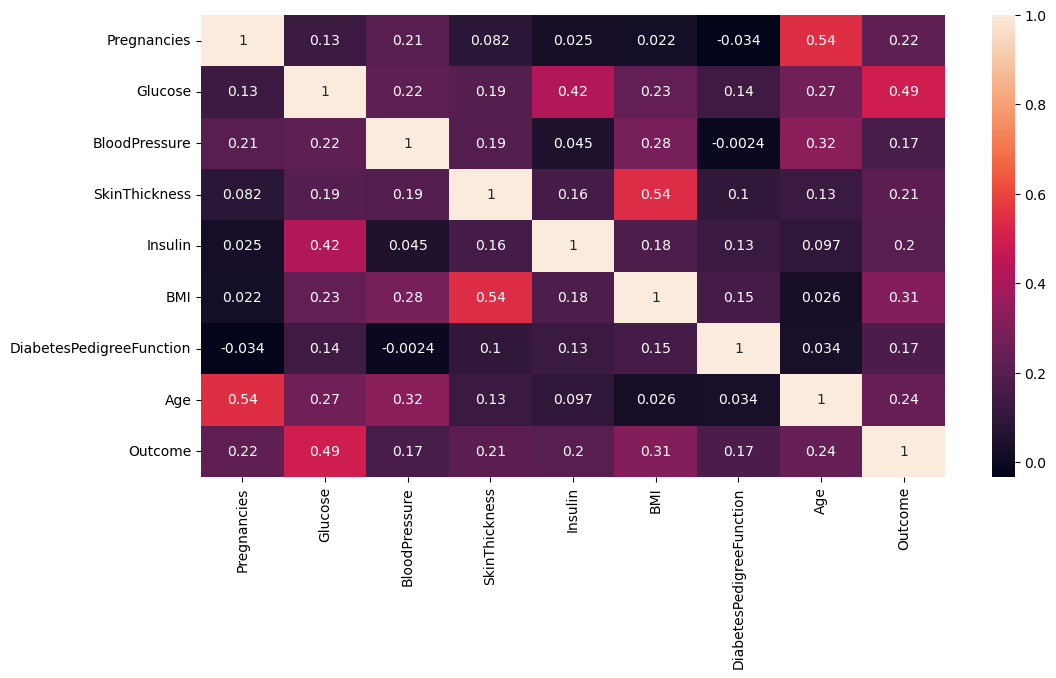

In [24]:
## Correlation between column

plt.figure(figsize= (12 , 6))
sns.heatmap(df.corr() , annot = True)
plt.show()

### Observation


Based on the Pearson Correlation COefficient we find that the column are lowly correlated to each other. Highest being between Pregnancies and Age which is moderately correlated. For our case we will be using all the columns.

Outcome
0    500
1    268
Name: count, dtype: int64


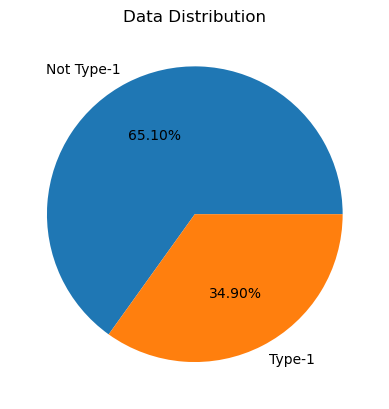

In [25]:
plt.pie(df['Outcome'].value_counts() , labels= ["Not Type-1" , "Type-1"] , autopct = "%.2f%%" )
plt.title("Data Distribution")
print(df['Outcome'].value_counts())
plt.show()

### Observation

Based on the above pie we see that 65% of the data belongs to Not Type-1 data and the rest 35% belongs to Type-1 data . Thus being an imbalanced dataset.

In [26]:
### Comparing different Age group and whether they have Type-1 diabetes

import plotly.express as px

fig = px.histogram(df, x='Age', color='Outcome', nbins=30,
                   labels={'Age': 'Age Distribution', 'Outcome': 'Diabetes Type'},
                   title='Age Distribution Among Patients with and Without Type-1 Diabetes')
fig.update_layout( xaxis_title='Age', yaxis_title='Count', legend_title='Diabetes Type')

fig.show()

### Observation

We see that the number of people not having Type-1 diabetes is higher in early age groups . We also see that people not having Type-1 diabates becomes significantly less with old age.

In [27]:
# Scatter plot for BMI vs. Glucose with custom colors
fig = px.scatter(df, x='BMI', y='Glucose', color='Outcome',
                 color_discrete_map={0: 'blue', 1 : 'red'},  # Specify custom colors
                 labels={'BMI': 'Body Mass Index (BMI)', 'Glucose': 'Glucose'},
                 title='Relationship between BMI and Glucose Levels')

# Update layout for better visualization
fig.update_layout(xaxis_title='BMI',
                  yaxis_title='Glucose',
                  legend_title='Diabetes Type',
                  )

# Show the plot
fig.show()

### Observation

People having high Glucose content and high BMI have higher chances of having Type-1 diabetes.

In [28]:
fig = px.histogram(df, x='Pregnancies', color='Outcome',
                   labels={'Pregnancies': 'Number of Pregnancies', 'Outcome': 'Diabetes Type'},
                   title='Pregnancies Distribution Among Patients with and Without Type-1 Diabetes')

# Update layout for better visualization
fig.update_layout(
                  xaxis_title='Number of Pregnancies',
                  yaxis_title='Count',
                  legend_title='Diabetes Type',
                  )

# Show the plot
fig.show()

### Observation

As the number of Pregnancies increases the chances of not having Type-1 diabetes decreases. Also people with higher pregnancies are more prone to be diagnosed with Type-1 diabetes.

## Dataset Transformation

In [29]:
df.var()

Pregnancies                   11.354056
Glucose                      926.489244
BloodPressure                146.328741
SkinThickness                 77.285567
Insulin                     7462.033002
BMI                           47.268056
DiabetesPedigreeFunction       0.109779
Age                          138.303046
Outcome                        0.227483
dtype: float64

We see that the data has very high variance in each colum. Because of this the data is more sensitive to change and thereby more 
prone to being overfitted after the model is trained. Also the dataset becomes more biased towards the larger values. Hence not producing the desired results.

In [30]:
## Using Standard Scalar

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [31]:
df_standard_x = pd.DataFrame(scaler.fit_transform(df.iloc[: , :-1].values) , columns=df.columns[:-1])
df_standard_x['Outcome'] = df['Outcome']

In [32]:
df_standard_x.var()

Pregnancies                 1.001304
Glucose                     1.001304
BloodPressure               1.001304
SkinThickness               1.001304
Insulin                     1.001304
BMI                         1.001304
DiabetesPedigreeFunction    1.001304
Age                         1.001304
Outcome                     0.227483
dtype: float64

In [33]:
## Using log transformation

df['Glucose'] = np.log(df['Glucose'])
df['BloodPressure'] = np.log(df['BloodPressure'])
df['SkinThickness'] = np.log(df['SkinThickness'])
df['Insulin'] = np.log(df['Insulin'])
df['BMI'] = np.log(df['BMI'])
df['DiabetesPedigreeFunction'] = np.log(df['DiabetesPedigreeFunction'])
df['Age'] = np.log(df['Age'])

In [34]:
df.var()

Pregnancies                 11.354056
Glucose                      0.062353
BloodPressure                0.030536
SkinThickness                0.107463
Insulin                      0.250383
BMI                          0.044447
DiabetesPedigreeFunction     0.415150
Age                          0.104137
Outcome                      0.227483
dtype: float64

We will be using log transformationas it has significantly decreased the variance in the data

## Removing the imbalance in the dataset

In [35]:
df.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0            6  4.997212       4.276666       3.555348  4.828314  3.514526   
1            1  4.442651       4.189655       3.367296  4.828314  3.280911   
2            8  5.209486       4.158883       3.367296  4.828314  3.148453   
3            1  4.488636       4.189655       3.135494  4.543295  3.335770   
4            0  4.919981       3.688879       3.555348  5.123964  3.763523   

   DiabetesPedigreeFunction       Age  Outcome  
0                 -0.466809  3.912023        1  
1                 -1.046969  3.433987        0  
2                 -0.397497  3.465736        1  
3                 -1.789761  3.044522        0  
4                  0.827678  3.496508        1

#### We will be using SMOTE for over sampling the imbalanced dataset

In [36]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [52]:
from imblearn.over_sampling import SMOTE

oversampling = SMOTE(sampling_strategy= 'minority' , random_state= 42)

In [53]:
xim , yim = oversampling.fit_resample(x , y)

### Splitting into train and test

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
## Splitting imbalanced dataset

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.3 , random_state = 42)

In [56]:
## Splitting the Balanced dataset

xim_train , xim_test , yim_train , yim_test = train_test_split(xim , yim , test_size= 0.3 , random_state= 42)

# MODEL Selection

Here we will be using Logistic Regression , Decision Trees , Random Forest , Gradient Bossting classifier

In [61]:
## Importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , classification_report

from sklearn.model_selection import GridSearchCV

## Logistic Regression

In [58]:
lr_imbalanced = LogisticRegression()
lr_balanced = LogisticRegression()

In [59]:
lr_imbalanced.fit(x_train , y_train)
lr_balanced.fit(xim_train , yim_train)

LogisticRegression()

In [62]:
print('Accuracy for imbalanced dataset : ' , accuracy_score(y_test , lr_imbalanced.predict(x_test)))
print('Accuracy for balanced dataset : ' , accuracy_score(yim_test , lr_balanced.predict(xim_test)))

Accuracy for imbalanced dataset :  0.7316017316017316
Accuracy for balanced dataset :  0.7766666666666666


In [64]:
## Classification Report for Imbalanced Data

print(classification_report(y_test , lr_imbalanced.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       151
           1       0.62      0.60      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



In [66]:
## Classification Report for Balanced Data

print(classification_report(yim_test , lr_balanced.predict(xim_test)))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       149
           1       0.77      0.79      0.78       151

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



## Decision Tree Classifier

In [67]:
dt = DecisionTreeClassifier()

parameter = {
    "criterion" : ["gini" , "entropy" , "log_loss"],
    "max_depth" : [3 , 4 , 5 , 6 , 7, 8],
    "splitter" : ["best" , "random"]
}

In [68]:
clf = GridSearchCV(dt ,
                  param_grid=parameter,
                  cv = 5)

#### For Imbalanced data

In [69]:
clf.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']})

In [70]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}

In [71]:
dt_imb = DecisionTreeClassifier(criterion= 'gini' , max_depth= 4 , splitter= 'random')

dt_imb.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=4, splitter='random')

In [72]:
print("Accuracy score for Imbalanced data : " , accuracy_score(y_test , dt_imb.predict(x_test)))

Accuracy score for Imbalanced data :  0.6883116883116883


In [73]:
print(classification_report(y_test , dt_imb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       151
           1       0.63      0.24      0.35        80

    accuracy                           0.69       231
   macro avg       0.66      0.58      0.57       231
weighted avg       0.67      0.69      0.64       231



#### For Balanced data

In [74]:
clf.fit(xim_train , yim_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']})

In [75]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}

In [76]:
dt_bal = DecisionTreeClassifier(criterion= 'gini' , max_depth= 4 , splitter= 'best')

dt_bal.fit(xim_train , yim_train)

DecisionTreeClassifier(max_depth=4)

In [77]:
print("Accuracy score for Balanced data : " , accuracy_score(yim_test , dt_bal.predict(xim_test)))

Accuracy score for Balanced data :  0.7333333333333333


In [78]:
print(classification_report(yim_test , dt_bal.predict(xim_test)))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       149
           1       0.73      0.75      0.74       151

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



## Random Forest Classifier

In [80]:
rf = RandomForestClassifier()

parameter = {
    "n_estimators" : [100 , 200 , 300 , 400 , 500],
    "criterion" : ['gini' , 'entropy' , 'log_loss'],
    "max_depth" : [1 , 2 , 3] , 
    "bootstrap" : [True , False]
}

In [81]:
clf = GridSearchCV(rf , 
                  param_grid= parameter , 
                  cv = 5)

#### For Imbalanced Data

In [82]:
clf.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [83]:
clf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 3,
 'n_estimators': 100}

In [84]:
rf_imb = RandomForestClassifier(bootstrap= True , criterion= 'entropy' , max_depth=3)

In [85]:
rf_imb.fit(x_train , y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

In [86]:
print("Accuracy score for Imbalanced data : " , accuracy_score(y_test , rf_imb.predict(x_test)))

Accuracy score for Imbalanced data :  0.7575757575757576


In [94]:
print(classification_report(y_test , rf_imb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       151
           1       0.68      0.57      0.62        80

    accuracy                           0.76       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



#### For Balanced data

In [87]:
clf.fit(xim_train , yim_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [88]:
clf.best_params_

{'bootstrap': True,
 'criterion': 'log_loss',
 'max_depth': 3,
 'n_estimators': 300}

In [89]:
rf_bal = RandomForestClassifier(n_estimators=300 , criterion= 'log_loss' , max_depth= 3 , bootstrap= True)

In [90]:
rf_bal.fit(xim_train , yim_train)

RandomForestClassifier(criterion='log_loss', max_depth=3, n_estimators=300)

In [93]:
print("Accuracy score for Balanced data : " , accuracy_score(yim_test , rf_bal.predict(xim_test)))

Accuracy score for Balanced data :  0.7466666666666667


In [95]:
print(classification_report(yim_test , rf_bal.predict(xim_test)))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       149
           1       0.72      0.81      0.76       151

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



## Gradient Boosting 

In [100]:
gb = GradientBoostingClassifier()

parameter = {
    'loss' : ['log_loss', 'exponential'],
    'learning_rate' : [0.1 , 0.5 , 1] ,
    'n_estimators' : [100 , 200 , 300 , 400 , 500],
    'max_depth' : [1 , 2, 3, 4, 5],
}

In [101]:
clf = GridSearchCV(gb ,
                  param_grid= parameter ,
                  cv = 5)

#### For Imbalanced Data

In [102]:
clf.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [103]:
clf.best_params_

{'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 2,
 'n_estimators': 100}

In [104]:
gb_imb = GradientBoostingClassifier(learning_rate= 0.1 , loss= 'exponential' , max_depth= 2 , n_estimators= 100)

In [105]:
gb_imb.fit(x_train , y_train)

GradientBoostingClassifier(loss='exponential', max_depth=2)

In [106]:
print("Accuracy score for Imbalanced data : " , accuracy_score(y_test , gb_imb.predict(x_test)))

Accuracy score for Imbalanced data :  0.7359307359307359


In [107]:
print(classification_report(y_test , gb_imb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.61      0.64      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



#### For Balanced Data

In [108]:
clf.fit(xim_train , yim_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [109]:
clf.best_params_

{'learning_rate': 0.5,
 'loss': 'exponential',
 'max_depth': 4,
 'n_estimators': 300}

In [110]:
gb_bal = GradientBoostingClassifier(learning_rate= 0.5 , loss = 'exponential' , max_depth= 4 , n_estimators= 300)

In [111]:
gb_bal.fit(xim_train , yim_train)

GradientBoostingClassifier(learning_rate=0.5, loss='exponential', max_depth=4,
                           n_estimators=300)

In [112]:
print("Accuracy score for Balanced data : " , accuracy_score(yim_test , gb_bal.predict(xim_test)))

Accuracy score for Balanced data :  0.75


In [113]:
print(classification_report(yim_test , gb_bal.predict(xim_test)))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       149
           1       0.74      0.77      0.76       151

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



## Observation

After using the 4 ML algorithm we see that the Logistic Regression is giving the best accuracy score of around 78% on balanced data. We also see that by removing the imbalance within the data we are getting better results in all the algorithm.